<a href="https://colab.research.google.com/github/Praxis-QR/FDS/blob/main/FinTech_1_Technical_Analysis_NSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![CC-BY-SA](https://licensebuttons.net/l/by-sa/3.0/88x31.png)<br>
<hr>

![alt text](https://github.com/Praxis-QR/RDWH/raw/main/images/YantraJaalBanner.png)<br>


<hr>

[Prithwis Mukerjee](http://www.linkedin.com/in/prithwis)<br>

In [1]:
from datetime import datetime
import pytz
print('Tested on ',datetime.now(pytz.timezone('Asia/Calcutta')))
!python --version
!lsb_release -a

Tested on  2025-10-28 06:54:03.646404+05:30
Python 3.12.12
No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.4 LTS
Release:	22.04
Codename:	jammy


#Getting Historical Stock Market Data / NSE <br>
What is a stock? Why is it important? [Read here](https://docs.google.com/presentation/d/1eRLBw2ATwJSa8qFu0YUUNIayAL2Mogm-Q6LljTHM4S4/edit?usp=sharing) <br>
NSE Data is available here #NSE Data is available at https://www.nseindia.com/report-detail/eq_security <br>
![alt text](https://raw.githubusercontent.com/Praxis-QR/FDS/main/images/nse201223.png)<br>For symbols like BHARTIARTL, LT, HULV, HDFC etc <br>


Index data is available here https://www1.nseindia.com/products/content/equities/indices/historical_index_data.htm <br>
BSE Historical Data is available at https://www.bseindia.com/markets/equity/EQReports/StockPrcHistori.html?flag=0




##Load, Clean NSE Data from CSV format

In [2]:
#NSE Data is available at https://www.nseindia.com/products/content/equities/equities/eq_security.htm
#Sample Data on four companies are available here
!wget -O hdfc.csv 'https://raw.githubusercontent.com/Praxis-QR/FDS/refs/heads/main/data/fintech/HDFC1YNSE.csv' # HDFC Bank
!wget -O hulv.csv 'https://raw.githubusercontent.com/Praxis-QR/FDS/refs/heads/main/data/fintech/HULV1NSE.csv' # Hindustan Unilever
!wget -O tata.csv 'https://raw.githubusercontent.com/Praxis-QR/FDS/refs/heads/main/data/fintech/TATA1YNSE.csv' # Tata Steel
!wget -O lnto.csv 'https://raw.githubusercontent.com/Praxis-QR/FDS/refs/heads/main/data/fintech/LNT1YNSE.csv' # Larsen & Toubr
!wget -O artl.csv 'https://raw.githubusercontent.com/Praxis-QR/FDS/refs/heads/main/data/fintech/AIRTEL1YNSE.csv' # Bharti Airtel

--2025-10-28 01:24:09--  https://raw.githubusercontent.com/Praxis-QR/FDS/refs/heads/main/data/fintech/HDFC1YNSE.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43235 (42K) [text/plain]
Saving to: ‘hdfc.csv’

hdfc.csv            100%[===================>]  42.22K  --.-KB/s    in 0.01s   

2025-10-28 01:24:09 (4.22 MB/s) - ‘hdfc.csv’ saved [43235/43235]

--2025-10-28 01:24:09--  https://raw.githubusercontent.com/Praxis-QR/FDS/refs/heads/main/data/fintech/HULV1NSE.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42386 (41K) [t

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#!cat hdfc.csv

In [4]:
dfchk = pd.read_csv('hdfc.csv', delimiter = ',')
#dfchk = pd.read_csv(nseData, delimiter = ',')
dfchk.head(3)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover ₹,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,BHARTIARTL,EQ,28-Oct-2024,"1,666.00","1,658.15","1,677.85","1,645.65","1,665.05","1,663.35","1,664.65","28,11,651","4,68,04,28,475.10","1,33,010","16,43,597",58.46
1,BHARTIARTL,EQ,29-Oct-2024,"1,663.35","1,650.50","1,667.95","1,610.00","1,641.90","1,637.10","1,632.06","69,90,747","11,40,93,14,583.90","2,32,073","30,33,389",43.39
2,BHARTIARTL,EQ,30-Oct-2024,"1,637.10","1,627.80","1,651.00","1,617.80","1,636.50","1,633.35","1,634.76","46,22,628","7,55,68,94,648.75","1,59,697","26,79,065",57.96


In [5]:
dfchk.plot(kind='line',x='Date',y='Close Price')

KeyError: 'Date'

In [6]:
dfchk.columns

Index(['Symbol  ', 'Series  ', 'Date  ', 'Prev Close  ', 'Open Price  ',
       'High Price  ', 'Low Price  ', 'Last Price  ', 'Close Price  ',
       'Average Price ', 'Total Traded Quantity  ', 'Turnover ₹  ',
       'No. of Trades  ', 'Deliverable Qty  ', '% Dly Qt to Traded Qty  '],
      dtype='object')

In [7]:
dropCols = ['Series  ',  'Prev Close  ', 'Last Price  ', 'Average Price ', 'Total Traded Quantity  ', 'Deliverable Qty  ', '% Dly Qt to Traded Qty  ','Turnover ₹  '  ]
#drop_cols = ['Symbol', 'Series', 'Date', 'Prev Close',  'Last Price',   'Total Traded Quantity']
dfchk.drop(dropCols,axis=1,inplace=True)

In [8]:
dfchk.columns

Index(['Symbol  ', 'Date  ', 'Open Price  ', 'High Price  ', 'Low Price  ',
       'Close Price  ', 'No. of Trades  '],
      dtype='object')

In [9]:
dfchk.rename(columns={'Date  ':'Date','Open Price  ':'OPEN','High Price  ':'HIGH','Low Price  ':'LOW','Close Price  ':'CLOSE','No. of Trades  ':'VOLUME'}, inplace=True)
dfchk.head(3)

,Symbol,Date,OPEN,HIGH,LOW,CLOSE,VOLUME
0,BHARTIARTL,28-Oct-2024,"1,658.15","1,677.85","1,645.65","1,663.35","1,33,010"
1,BHARTIARTL,29-Oct-2024,"1,650.50","1,667.95","1,610.00","1,637.10","2,32,073"
2,BHARTIARTL,30-Oct-2024,"1,627.80","1,651.00","1,617.80","1,633.35","1,59,697"


In [10]:
dfchk.plot(kind='line',x='Date',y='OPEN')

TypeError: no numeric data to plot

In [11]:
dfchk.dtypes

,0
Symbol,object
Date,object
OPEN,object
HIGH,object
LOW,object
CLOSE,object
VOLUME,object


In [ ]:
#dfchk.rename(columns={'Date ':'Date','OPEN ':'OPEN','HIGH ':'HIGH','LOW ':'LOW','close ':'CLOSE','VOLUME ':'VOLUME'}, inplace=True)
#dfchk.head(3)

In [12]:
x = dfchk.OPEN.dtypes
print(x)

object


In [13]:
if (dfchk.OPEN.dtypes == 'object'):
    print('string')
if (dfchk.OPEN.dtypes == 'float64'):
    print('numeric')

string


In [14]:
dfchk['Date'] = pd.to_datetime(dfchk['Date'],format='%d-%b-%Y')
if (dfchk.OPEN.dtypes == 'object'):
    dfchk['OPEN'] = pd.to_numeric(dfchk['OPEN'].str.replace(',', ''))
if (dfchk.HIGH.dtypes == 'object'):
    dfchk['HIGH'] = pd.to_numeric(dfchk['HIGH'].str.replace(',', ''))
if (dfchk.LOW.dtypes == 'object'):
    dfchk['LOW'] = pd.to_numeric(dfchk['LOW'].str.replace(',', ''))
if (dfchk.CLOSE.dtypes == 'object'):
    dfchk['CLOSE'] = pd.to_numeric(dfchk['CLOSE'].str.replace(',', ''))
if (dfchk.VOLUME.dtypes == 'object'):
    dfchk['VOLUME'] = pd.to_numeric(dfchk['VOLUME'].str.replace(',', ''))
dfchk.head(3)

,Symbol,Date,OPEN,HIGH,LOW,CLOSE,VOLUME
0,BHARTIARTL,2024-10-28,1658.15,1677.85,1645.65,1663.35,133010
1,BHARTIARTL,2024-10-29,1650.50,1667.95,1610.00,1637.10,232073
2,BHARTIARTL,2024-10-30,1627.80,1651.00,1617.80,1633.35,159697


In [15]:
dfchk.dtypes

,0
Symbol,object
Date,datetime64[ns]
OPEN,float64
HIGH,float64
LOW,float64
CLOSE,float64
VOLUME,int64


<Axes: xlabel='Date'>

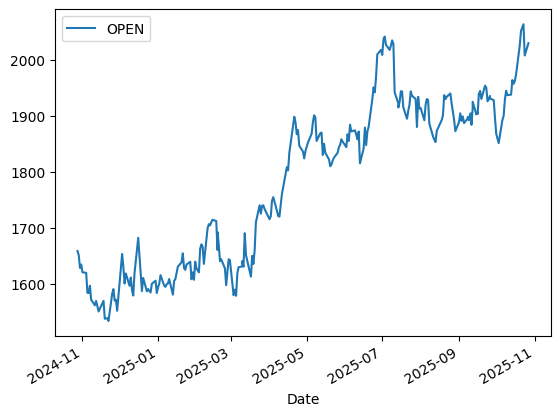

In [16]:
dfchk.plot(kind='line',x='Date',y='OPEN')

In [17]:
dfchk = dfchk.sort_values('Date')
dfchk.head()

,Symbol,Date,OPEN,HIGH,LOW,CLOSE,VOLUME
0,BHARTIARTL,2024-10-28,1658.15,1677.85,1645.65,1663.35,133010
1,BHARTIARTL,2024-10-29,1650.50,1667.95,1610.00,1637.10,232073
2,BHARTIARTL,2024-10-30,1627.80,1651.00,1617.80,1633.35,159697
3,BHARTIARTL,2024-10-31,1634.00,1638.80,1602.15,1612.60,235785
4,BHARTIARTL,2024-11-01,1620.00,1626.35,1605.35,1616.45,15038


In [18]:
def formatNSEdata(csvfile):
    df = pd.read_csv(csvfile, delimiter = ',')
    dropCols = ['Series  ',  'Prev Close  ', 'Last Price  ', 'Average Price ', 'Total Traded Quantity  ', 'Deliverable Qty  ', '% Dly Qt to Traded Qty  ','Turnover ₹  '  ]
    df.drop(dropCols,axis=1,inplace=True)
    df.rename(columns={'Date  ':'Date','Open Price  ':'OPEN','High Price  ':'HIGH','Low Price  ':'LOW','Close Price  ':'CLOSE','No. of Trades  ':'VOLUME'}, inplace=True)
    df['Date'] = pd.to_datetime(df['Date'],format='%d-%b-%Y')
    if (df.OPEN.dtypes == 'object'):
        df['OPEN'] = pd.to_numeric(df['OPEN'].str.replace(',', ''))
    if (df.HIGH.dtypes == 'object'):
        df['HIGH'] = pd.to_numeric(df['HIGH'].str.replace(',', ''))
    if (df.LOW.dtypes == 'object'):
        df['LOW'] = pd.to_numeric(df['LOW'].str.replace(',', ''))
    if (df.CLOSE.dtypes == 'object'):
        df['CLOSE'] = pd.to_numeric(df['CLOSE'].str.replace(',', ''))
    if (df.VOLUME.dtypes == 'object'):
        df['VOLUME'] = pd.to_numeric(df['VOLUME'].str.replace(',', ''))
    df = df.sort_values('Date')
    return df


In [20]:
dfhdfc = formatNSEdata('hdfc.csv')
dfhdfc.head()

,Symbol,Date,OPEN,HIGH,LOW,CLOSE,VOLUME
0,HDFCBANK,2024-10-28,1742.00,1751.00,1728.9,1734.20,334425
1,HDFCBANK,2024-10-29,1726.15,1764.00,1725.1,1751.85,381375
2,HDFCBANK,2024-10-30,1742.00,1754.75,1724.2,1734.60,350916
3,HDFCBANK,2024-10-31,1728.00,1738.90,1719.4,1735.70,277300
4,HDFCBANK,2024-11-01,1733.00,1744.10,1726.1,1737.30,69860


In [21]:
dfhulv = formatNSEdata('hulv.csv')
dfhulv.head()

,Symbol,Date,OPEN,HIGH,LOW,CLOSE,VOLUME
0,HINDUNILVR,2024-10-28,2544.00,2589.60,2520.10,2575.80,72864
1,HINDUNILVR,2024-10-29,2585.70,2585.70,2536.00,2547.65,112534
2,HINDUNILVR,2024-10-30,2557.00,2563.30,2533.40,2554.95,93066
3,HINDUNILVR,2024-10-31,2554.95,2563.50,2524.10,2528.25,108312
4,HINDUNILVR,2024-11-01,2543.95,2545.95,2511.35,2537.50,14828


In [22]:
dflnto = formatNSEdata('lnto.csv')
dflnto.head()

,Symbol,Date,OPEN,HIGH,LOW,CLOSE,VOLUME
0,LT,2024-10-28,3316.00,3373.00,3262.55,3340.80,206122
1,LT,2024-10-29,3316.00,3384.40,3316.00,3380.90,138485
2,LT,2024-10-30,3379.95,3438.40,3353.00,3408.35,108896
3,LT,2024-10-31,3530.00,3654.95,3508.35,3622.30,368713
4,LT,2024-11-01,3624.95,3641.90,3620.00,3626.35,21833


In [23]:
dftata = formatNSEdata('tata.csv')
dftata.head()

,Symbol,Date,OPEN,HIGH,LOW,CLOSE,VOLUME
0,TATASTEEL,2024-10-28,146.00,149.73,144.73,149.38,202518
1,TATASTEEL,2024-10-29,149.85,150.45,146.55,150.06,278118
2,TATASTEEL,2024-10-30,148.10,150.95,148.10,148.97,179907
3,TATASTEEL,2024-10-31,149.08,149.95,148.20,148.56,192116
4,TATASTEEL,2024-11-01,149.66,150.25,149.00,149.75,90862


#Basic Charts

##One Company Data

In [56]:
#dfHDFC = pd.read_csv('hdfc.csv', delimiter = ',')
dfartl = formatNSEdata('artl.csv')
#dfHDFC.count()
dfartl.head()

,Symbol,Date,OPEN,HIGH,LOW,CLOSE,VOLUME
0,BHARTIARTL,2024-10-28,1658.15,1677.85,1645.65,1663.35,133010
1,BHARTIARTL,2024-10-29,1650.50,1667.95,1610.00,1637.10,232073
2,BHARTIARTL,2024-10-30,1627.80,1651.00,1617.80,1633.35,159697
3,BHARTIARTL,2024-10-31,1634.00,1638.80,1602.15,1612.60,235785
4,BHARTIARTL,2024-11-01,1620.00,1626.35,1605.35,1616.45,15038


In [57]:
#Number of trading days / data points
dfartl.count()

,0
Symbol,258
Date,258
OPEN,258
HIGH,258
LOW,258
CLOSE,258
VOLUME,258


<Axes: xlabel='Date'>

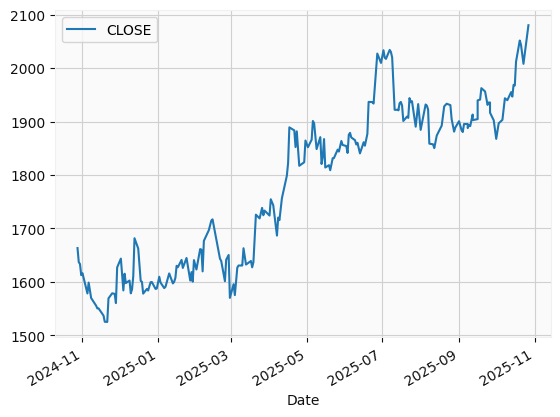

In [58]:
dfartl.plot(kind='line',x='Date',y='CLOSE')

In [59]:
startDate = dfartl['Date'][dfartl.index[0]]
endDate = dfartl['Date'][dfartl.index[-1]]
print(startDate,endDate)

2024-10-28 00:00:00 2025-10-27 00:00:00


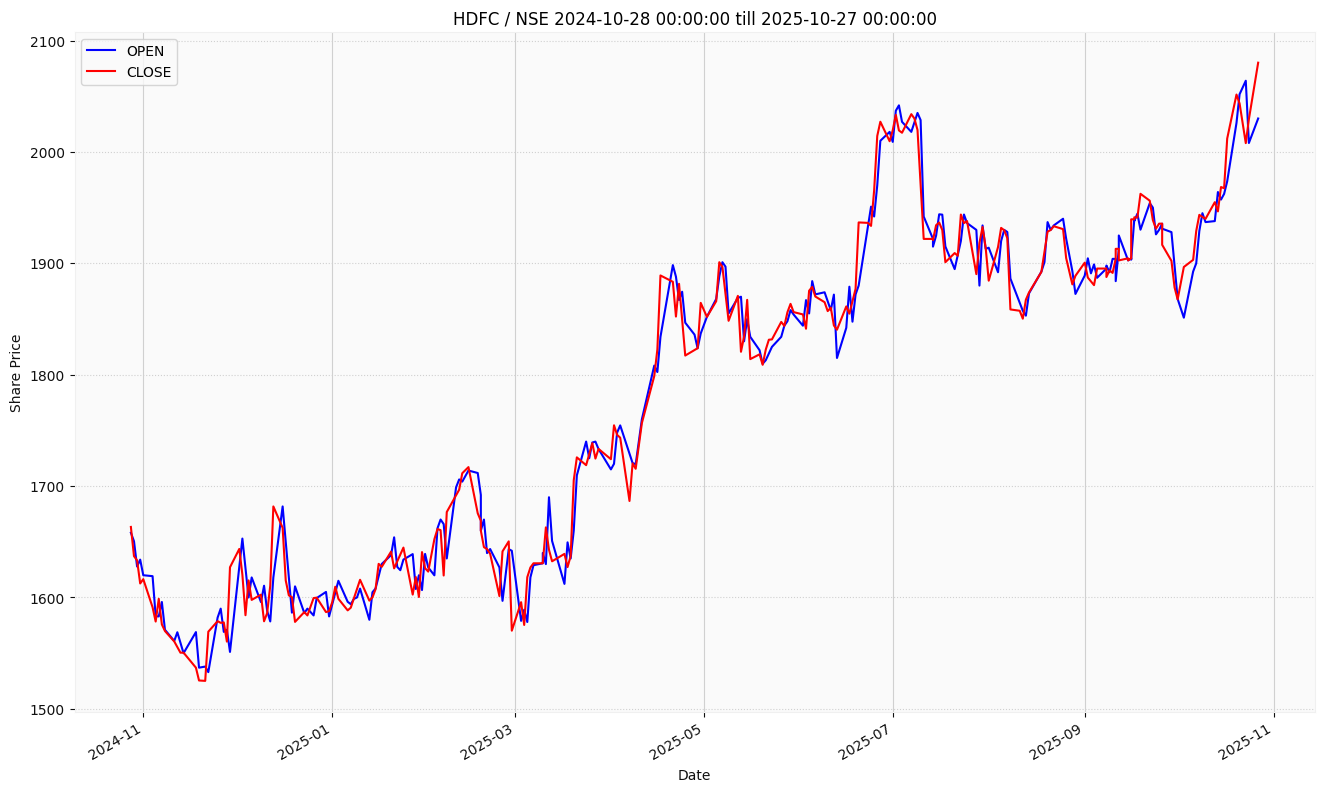

In [60]:
# Plotting directly from DataFrames with Pandas
dfartl.plot(
    x='Date',
    y=['OPEN', 'CLOSE'],
    kind='line',
    legend=False,
    color=['blue','red'],
    figsize=(16,10)

)

# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel('Share Price')
plt.xlabel("Date")
plt.title("HDFC / NSE "+str(startDate)+" till "+str(endDate))
plt.legend()
plt.gca().yaxis.grid(linestyle=':')

Why did the HDFC Bank share price so much on 18th September ? [See](https://tradingqna.com/t/hdfc-bank-goes-ex-split-in-the-ratio-2-1-on-september-19-2019-here-s-how-it-impacts-your-equity-holdings-and-f-o-positions/63025)

##Compare Two Companies

In [61]:
dfartl = formatNSEdata('artl.csv')
dfHUL = formatNSEdata('hulv.csv')

In [64]:
dfartl = formatNSEdata('artl.csv')
dfartl.head(2)

,Symbol,Date,OPEN,HIGH,LOW,CLOSE,VOLUME
0,BHARTIARTL,2024-10-28,1658.15,1677.85,1645.65,1663.35,133010
1,BHARTIARTL,2024-10-29,1650.50,1667.95,1610.00,1637.10,232073


In [65]:
dfHUL = formatNSEdata('hulv.csv')
dfHUL.head(2)

,Symbol,Date,OPEN,HIGH,LOW,CLOSE,VOLUME
0,HINDUNILVR,2024-10-28,2544.0,2589.6,2520.1,2575.80,72864
1,HINDUNILVR,2024-10-29,2585.7,2585.7,2536.0,2547.65,112534


In [66]:
df2Com = pd.merge(dfartl[['Date','CLOSE']],dfHUL[['Date','CLOSE']],on='Date')
df2Com.head(2)

,Date,CLOSE_x,CLOSE_y
0,2024-10-28,1663.35,2575.80
1,2024-10-29,1637.10,2547.65


In [67]:
df2Com = df2Com.rename(columns ={'CLOSE_x':'ARTL','CLOSE_y':'HUL'})
df2Com.head(2)

,Date,ARTL,HUL
0,2024-10-28,1663.35,2575.80
1,2024-10-29,1637.10,2547.65


In [68]:
startDate = df2Com['Date'][df2Com.index[0]]
endDate = df2Com['Date'][df2Com.index[-1]]
print(startDate,endDate)

2024-10-28 00:00:00 2025-10-27 00:00:00


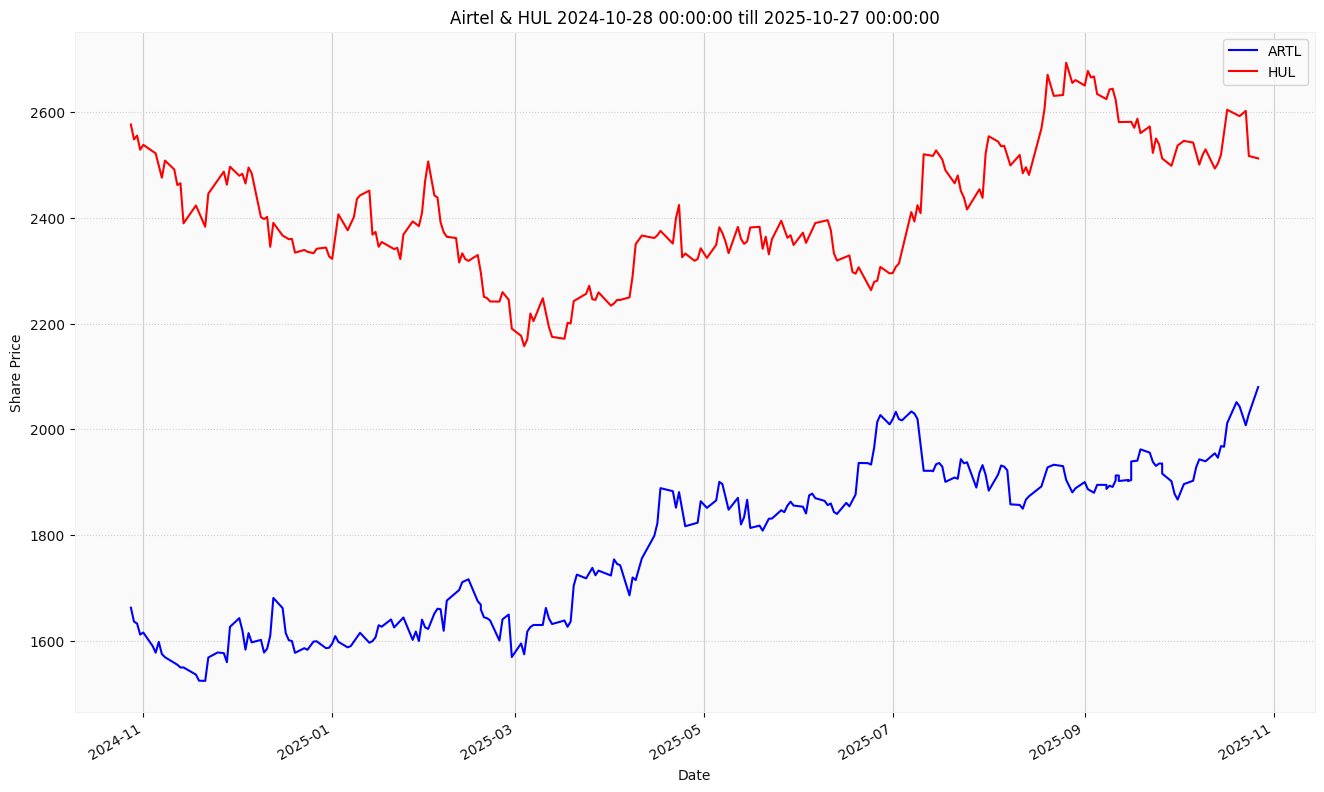

In [70]:
# Plotting directly from DataFrames with Pandas
df2Com.plot(
    x='Date',
    y=['ARTL', 'HUL'],
    kind='line',
    legend=False,
    color=['blue','red'],
    figsize=(16,10)

)

# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel('Share Price')
plt.xlabel("Date")
plt.title("Airtel & HUL "+str(startDate)+" till "+str(endDate))
plt.legend()
plt.gca().yaxis.grid(linestyle=':')

##Compare Three Companies

In [71]:
dfLNTO = formatNSEdata('lnto.csv')
dfLNTO.head(2)

,Symbol,Date,OPEN,HIGH,LOW,CLOSE,VOLUME
0,LT,2024-10-28,3316.0,3373.0,3262.55,3340.8,206122
1,LT,2024-10-29,3316.0,3384.4,3316.00,3380.9,138485


In [72]:
df3Com = pd.merge(df2Com[['Date','ARTL','HUL']],dfLNTO[['Date','CLOSE']],on='Date')
df3Com.head(2)

,Date,ARTL,HUL,CLOSE
0,2024-10-28,1663.35,2575.80,3340.8
1,2024-10-29,1637.10,2547.65,3380.9


In [73]:
df3Com = df3Com.rename(columns ={'CLOSE':'L&T'})
df3Com.head(2)

,Date,ARTL,HUL,L&T
0,2024-10-28,1663.35,2575.80,3340.8
1,2024-10-29,1637.10,2547.65,3380.9


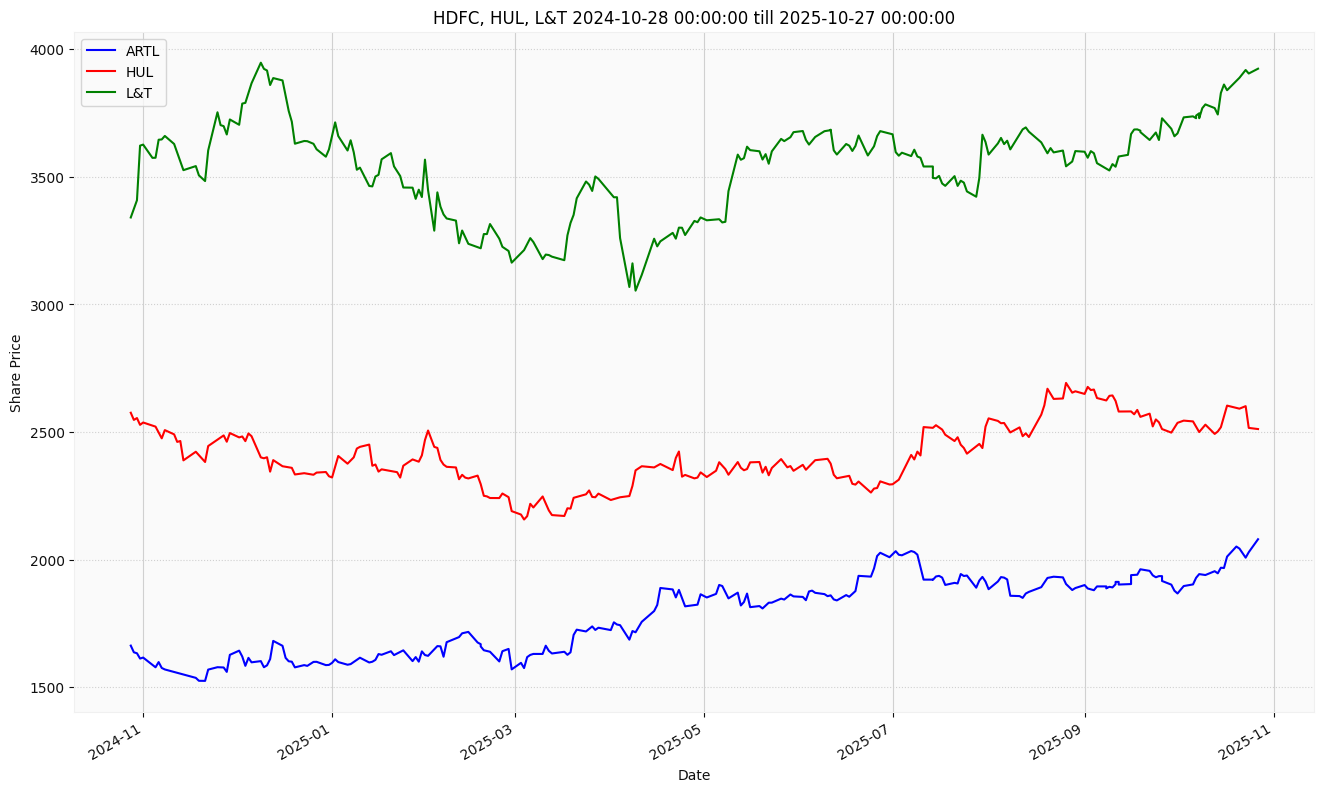

In [74]:
# Plotting directly from DataFrames with Pandas
df3Com.plot(
    x='Date',
    y=['ARTL', 'HUL', 'L&T'],
    kind='line',
    legend=False,
    color=['blue','red', 'green'],
    figsize=(16,10)
)

# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel('Share Price')
plt.xlabel("Date")
plt.title("HDFC, HUL, L&T "+str(startDate)+" till "+str(endDate))
plt.legend()
plt.gca().yaxis.grid(linestyle=':')

#Scaling the Data

In [75]:
df = df3Com.copy()
df.head()

,Date,ARTL,HUL,L&T
0,2024-10-28,1663.35,2575.80,3340.80
1,2024-10-29,1637.10,2547.65,3380.90
2,2024-10-30,1633.35,2554.95,3408.35
3,2024-10-31,1612.60,2528.25,3622.30
4,2024-11-01,1616.45,2537.50,3626.35


In [76]:
df['ARTL'] = df['ARTL']/df['ARTL'][0]
df['HUL'] = df['HUL']/df['HUL'][0]
df['L&T'] = df['L&T']/df['L&T'][0]
df.head(10)

,Date,ARTL,HUL,L&T
0,2024-10-28,1.000000,1.000000,1.000000
1,2024-10-29,0.984219,0.989071,1.012003
2,2024-10-30,0.981964,0.991905,1.020220
3,2024-10-31,0.969489,0.981540,1.084261
4,2024-11-01,0.971804,0.985131,1.085474
5,2024-11-04,0.956654,0.980200,1.069938
6,2024-11-05,0.948928,0.978861,1.070043
7,2024-11-06,0.961193,0.970844,1.091191
8,2024-11-07,0.947365,0.961061,1.091520
9,2024-11-08,0.943818,0.973562,1.095636


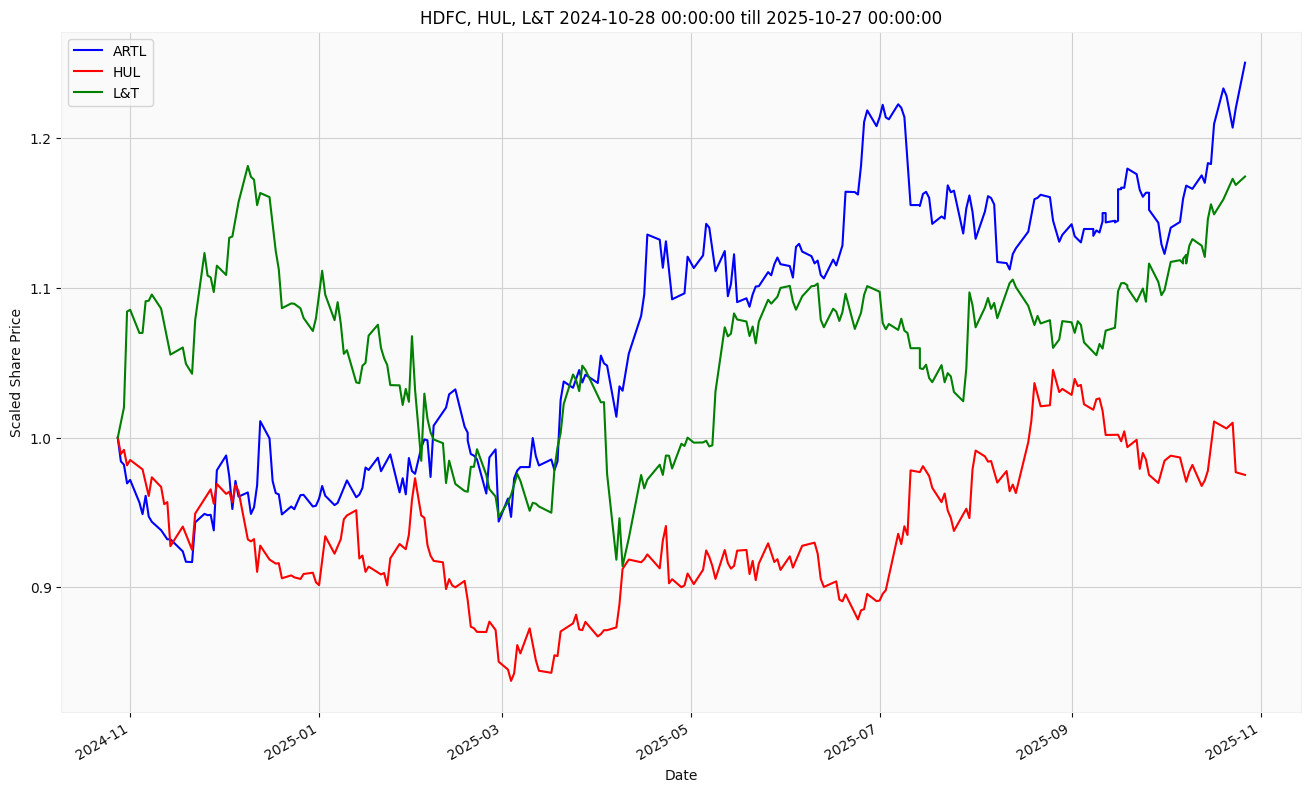

In [77]:
# Plotting directly from DataFrames with Pandas
df.plot(
    x='Date',
    y=['ARTL', 'HUL', 'L&T'],
    kind='line',
    legend=False,
    color=['blue','red', 'green'],
    figsize=(16,10)
)

# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel('Scaled Share Price')
plt.xlabel("Date")
plt.title("HDFC, HUL, L&T "+str(startDate)+" till "+str(endDate))
plt.legend()

#Simple Moving Average

In [78]:
df = formatNSEdata('hulv.csv')
df.head(2)

,Symbol,Date,OPEN,HIGH,LOW,CLOSE,VOLUME
0,HINDUNILVR,2024-10-28,2544.0,2589.6,2520.1,2575.80,72864
1,HINDUNILVR,2024-10-29,2585.7,2585.7,2536.0,2547.65,112534


In [79]:
df.set_index('Date',inplace=True)
df.head(3)

,Symbol,OPEN,HIGH,LOW,CLOSE,VOLUME
Date,,,,,,
2024-10-28,HINDUNILVR,2544.0,2589.6,2520.1,2575.80,72864
2024-10-29,HINDUNILVR,2585.7,2585.7,2536.0,2547.65,112534
2024-10-30,HINDUNILVR,2557.0,2563.3,2533.4,2554.95,93066


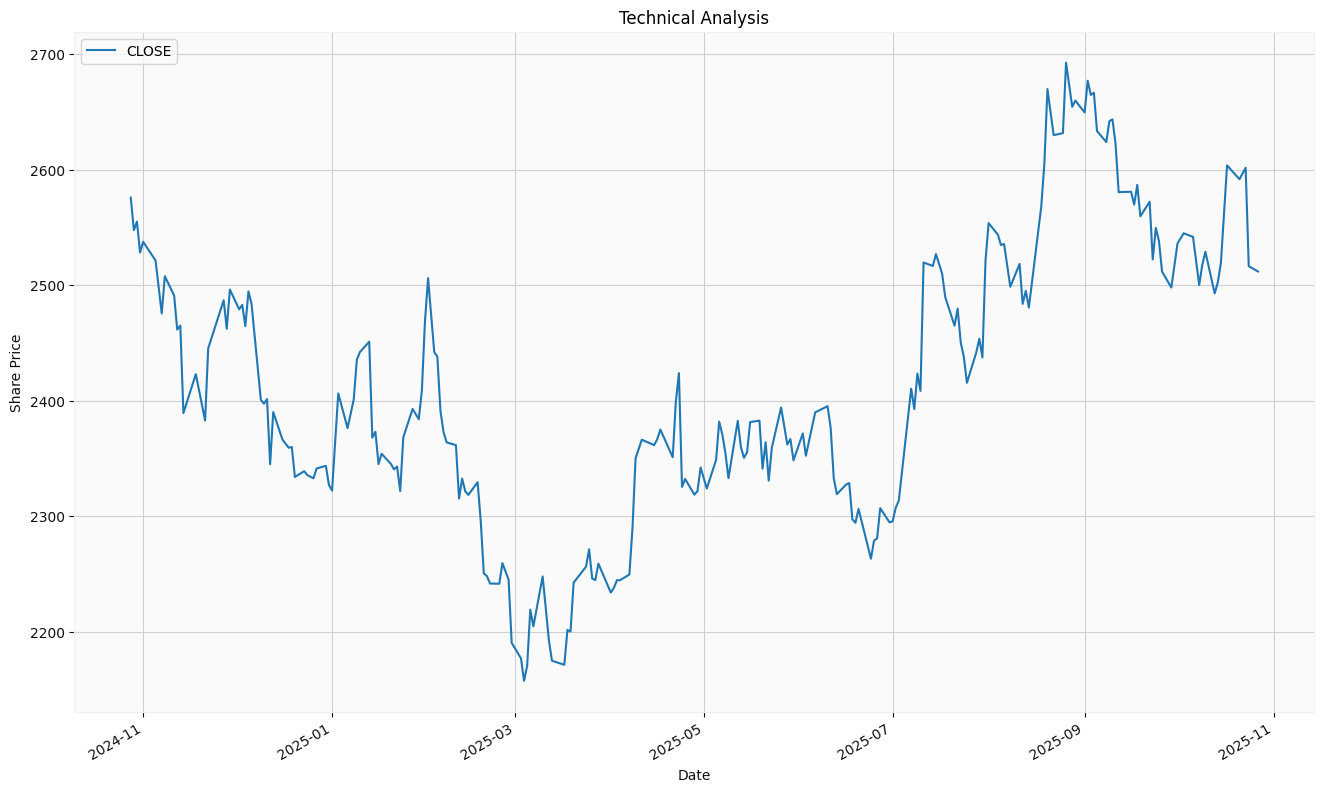

In [80]:
df.plot(y='CLOSE', figsize=(16,10))

# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel('Share Price')
plt.xlabel("Date")
plt.title("Technical Analysis")
plt.legend(loc='upper left')

In [81]:
df['SMA10'] = df['CLOSE'].rolling(10).mean()
df['SMA30'] = df['CLOSE'].rolling(30).mean()
#df.tail()
#df.head(40)
df.count()

,0
Symbol,248
OPEN,248
HIGH,248
LOW,248
CLOSE,248
VOLUME,248
SMA10,239
SMA30,219


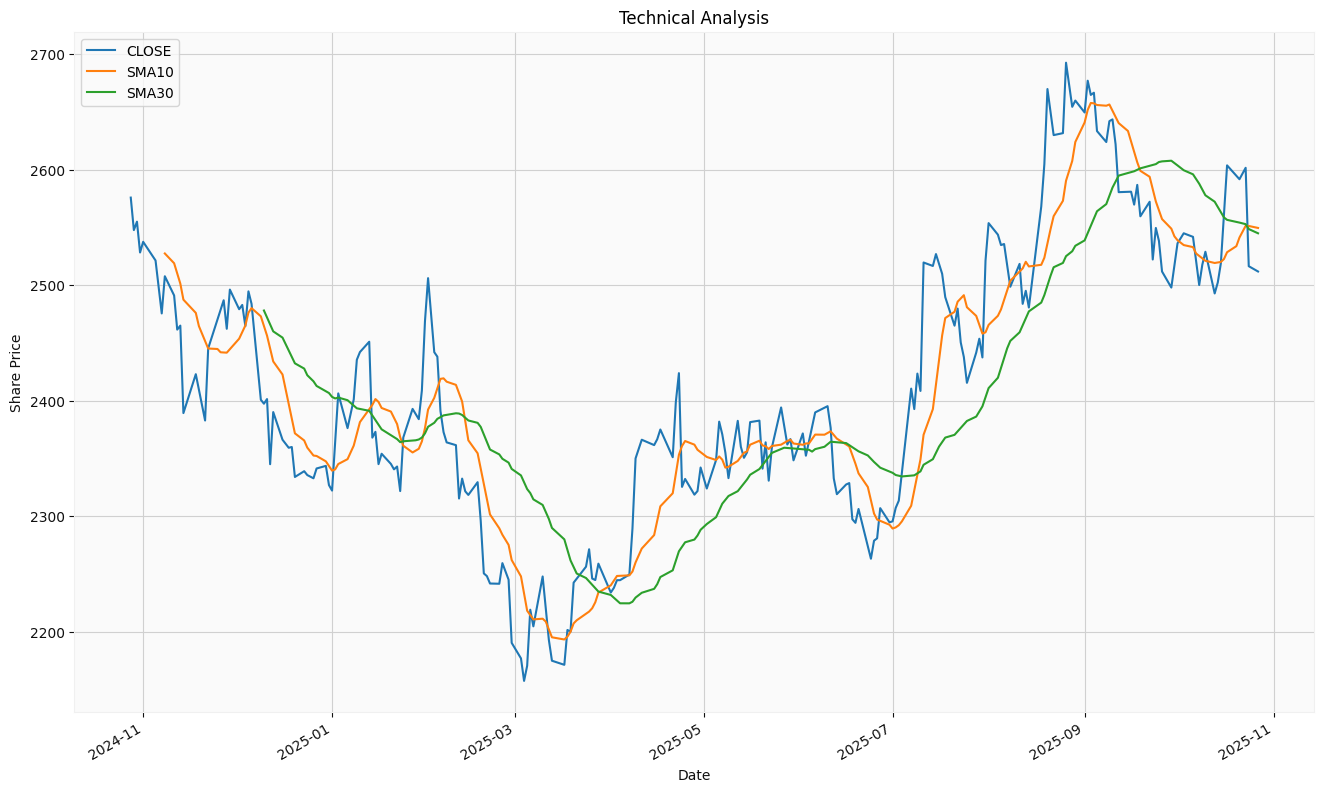

In [82]:
df.plot(y=['CLOSE','SMA10','SMA30'],
        figsize=(16,10))

# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel('Share Price')
plt.xlabel("Date")
plt.title("Technical Analysis")
plt.legend(loc='upper left')

#Technical Charts

In [83]:
!pip install mplfinance > /dev/null
import mplfinance as mpf

In [ ]:
#df = pd.read_csv('hdfc.csv', delimiter = ',')
#df.head()

In [ ]:
#list(df.columns)
#drop_cols = ['Symbol', 'Series', 'Date', 'Prev Close',  'Last Price',   'Total Traded Quantity']
#df.drop(dropCols,axis=1,inplace=True)
#df.head(3)

In [ ]:
#df.rename(columns={'Open Price':'Open','High Price':'High','Low Price':'Low','Close Price':'Close','Total Traded Quantity':'Volume'}, inplace=True)
#df.head(3)

In [ ]:
#df['Date'] = pd.to_datetime(df['Date'])
#df.head(3)

In [84]:
df = formatNSEdata('hulv.csv')
df.head(2)

,Symbol,Date,OPEN,HIGH,LOW,CLOSE,VOLUME
0,HINDUNILVR,2024-10-28,2544.0,2589.6,2520.1,2575.80,72864
1,HINDUNILVR,2024-10-29,2585.7,2585.7,2536.0,2547.65,112534


In [85]:
df.set_index('Date',inplace=True)
df.head(3)

,Symbol,OPEN,HIGH,LOW,CLOSE,VOLUME
Date,,,,,,
2024-10-28,HINDUNILVR,2544.0,2589.6,2520.1,2575.80,72864
2024-10-29,HINDUNILVR,2585.7,2585.7,2536.0,2547.65,112534
2024-10-30,HINDUNILVR,2557.0,2563.3,2533.4,2554.95,93066


In [86]:
df.rename(columns={'Date ':'Date','OPEN':'Open','HIGH':'High','LOW':'Low','CLOSE':'Close','VOLUME':'Volume'}, inplace=True)

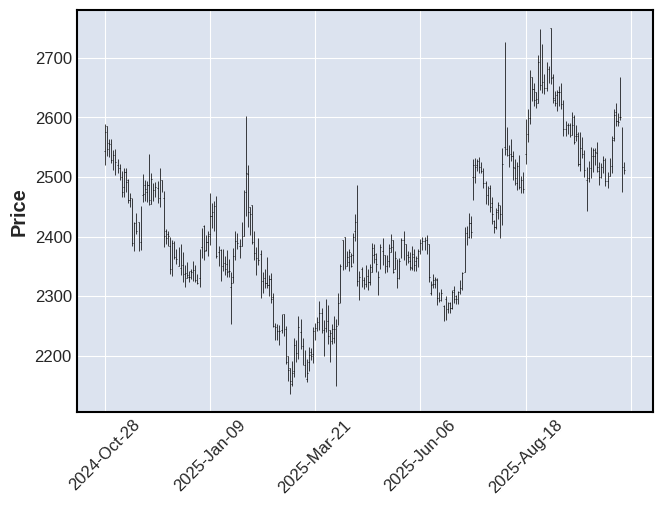

In [52]:
#very basic usage
mpf.plot(df)

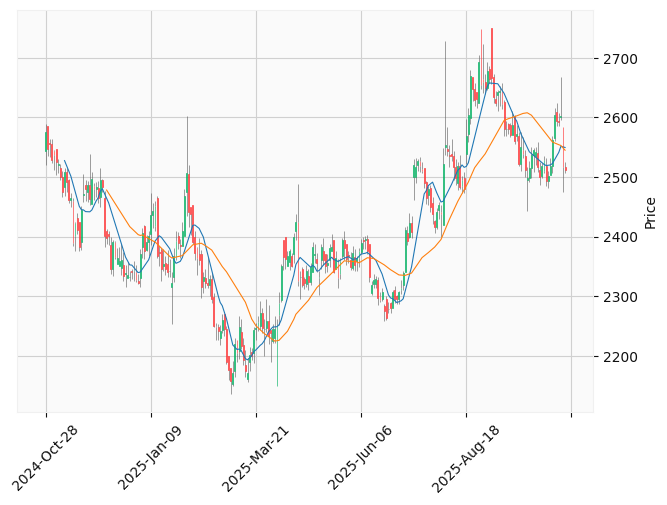

In [87]:
#add moving average and candles
mpf.plot(df, type='candle',mav=(10,30), style='yahoo')

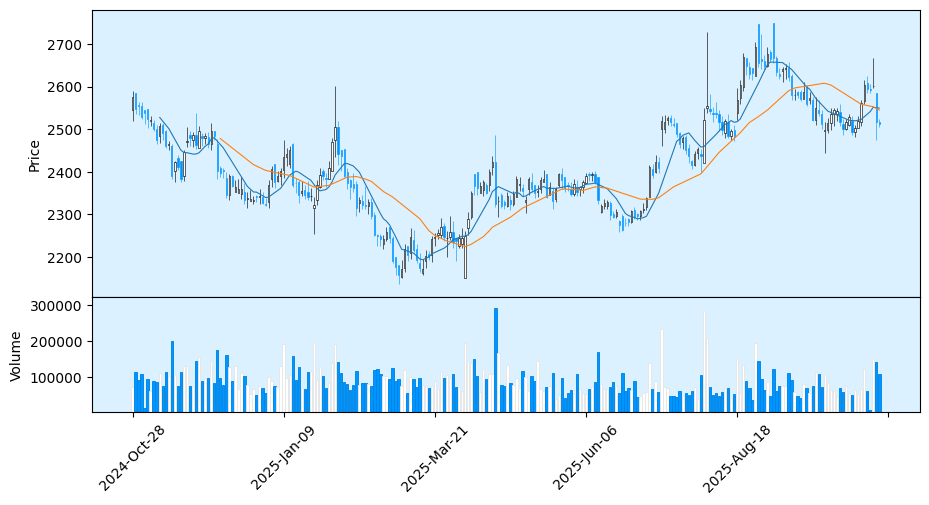

In [88]:
#add volume
mpf.plot(df, type='candle',mav=(10,30), style='blueskies', volume=True,figratio=(20,10))

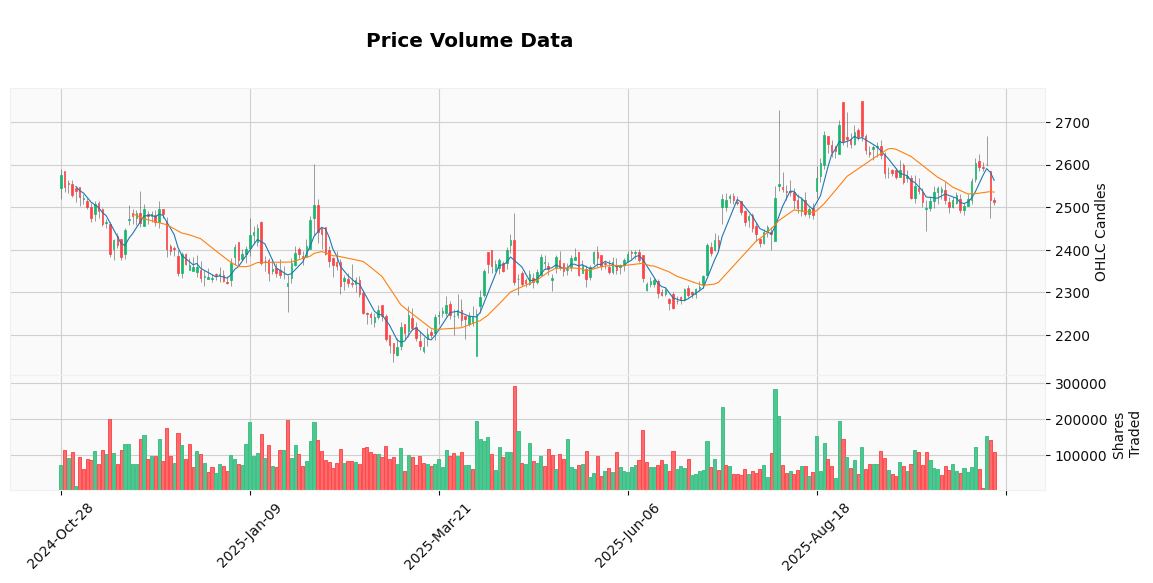

In [89]:
mpf.plot(df, type='candle',
         style='yahoo',
         mav=(5,20),
         volume=True,
         figratio=(30,12),
         title='\nPrice Volume Data',
         ylabel='OHLC Candles',
         ylabel_lower='Shares \nTraded')

#Exercise
Visit the NSE site https://www1.nseindia.com/products/content/equities/equities/eq_security.htm <br>
or BSE Site BSE Historical Data is available at https://www.bseindia.com/markets/equity/EQReports/StockPrcHistori.html?flag=0 <br>

![alt text](https://github.com/Praxis-QR/FDS/raw/main/images/BSEHistoricData.png)<br>
get the data for three other companies and perform the same analysis


#ChronoTYM <br>
In Indic phraseology, tantra is knowledge, a yantra is a device to explore this knowledge and a mantra is the code that unlocks both the tantra and its yantra. Chrono/TYM a sci-fi trilogy that recreates this framework where the first novel Chronotantra defines the contours of a tech driven, futuristic society, the second, Chronoyantra, describes a device used to explore the genesis of this society, while the third, Chronomantra finally reveals the code, the key, that unlocks this puzzle.  [More information](http://bit.ly/chronobooks) <br>
![alt text](https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEjdu_ajYwBRzk5iFYlcs59ZoRMMg6rhNm4JERKspvFJoveJsnfwRlzMICiC37UOja_Bd4sbfLA1pyyBbe0mj3tUfDBXoqCzNUDw3Wux7acoJBaLkWjAvJXfa7drRY2GQRAlFxEY9O7a7raY4RKy7cA3Uxgf5QsaZQ99C9GfXxFSex_rke8ROhAn41t8zOqK/s1640/tymBanner01_3.png)